In [8]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as st

import seaborn as sns
import seaborn.objects as so

In [9]:
#HYPOTHESIS

#1) Misha
    #HYPOTHESIS 1A - (MISHA)
        #HYBRID CANNABIS TYPES HAVE MORE HAPPY EFFECTS COMPARED TO OTHER TYPES OF CANNABIS (USING EFFECT 1)
    #HYPOTHESIS 1B - (MISHA)
        #there is a significant difference in rating when comparing different types of cannabis
    #HYPOTHESIS 1C - (MISHA)
        #the main effect experienced by consuming any type of cannabis is “relaxed”
    


#2) Kim
    #Does sweet profile cannabis have a higher rating?
        #What Flavor had the Max Rating
        #What Flavor has the min Rating
        #What Flavor has the median Rating
    
#3) #Latti
    #Does the location of the breeder impact the rating? Does the location impact the type that is grown?


#4)  Tacha
    #Is there a significant difference in the effects experienced by consumers when they rate the same cannabis type differently? 
    #(Use data to get the ratings of the cannabis type and analyze the effects reported to see if they are consistent.) Do users feel different effects when they use the same type of cannabis(yes). How does this affect how they rate it? Ex: Hybrid- 13 users said it made them aroused. What is the average rating reported by those 13 people? Repeat for a few more effects in Hybrid, Sativa, then Indica.
    #Happiness

In [10]:
#Get CSV data
Original_Data = pd.read_csv("MaryJane_clean_data.csv",encoding='latin-1')
Original_Data.head()

,Strain,Type,Rating,Effects,Flavor,Description,effect 1,effect 2,effect 3,effect 4,effect 5,flavor 1,flavor 2,flavor 3,num_effects,num_flavors
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,5.0,3.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The â98 Aloha White Widow is an especially p...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,5.0,3.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,5.0,3.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,5.0,3.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,5.0,3.0


In [11]:
#Split Effects column into different columns
Original_Data.Effects.str.split(",",expand=True)

,0,1,2,3,4
0,Creative,Energetic,Tingly,Euphoric,Relaxed
1,Relaxed,Aroused,Creative,Happy,Energetic
2,Uplifted,Happy,Relaxed,Energetic,Creative
3,Tingly,Creative,Hungry,Relaxed,Uplifted
4,Happy,Relaxed,Euphoric,Uplifted,Talkative
...,...,...,...,...,...
2048,Happy,Uplifted,Relaxed,Euphoric,Energetic
2049,Relaxed,Happy,Euphoric,Uplifted,Sleepy
2050,Relaxed,Sleepy,Talkative,Euphoric,Happy
2051,Relaxed,Sleepy,Euphoric,Happy,Hungry


In [12]:
#Create a data frame for the different effects and name the column titles
effects = Original_Data.Effects.str.split(",",expand=True)
effects.columns=["effect_1", "effect_2", "effect_3", "effect_4", "effect_5"]
effects.head()

,effect_1,effect_2,effect_3,effect_4,effect_5
0,Creative,Energetic,Tingly,Euphoric,Relaxed
1,Relaxed,Aroused,Creative,Happy,Energetic
2,Uplifted,Happy,Relaxed,Energetic,Creative
3,Tingly,Creative,Hungry,Relaxed,Uplifted
4,Happy,Relaxed,Euphoric,Uplifted,Talkative


In [13]:
#Create a data frame for the different flavors and name the column titles
flavors = Original_Data.Flavor.str.split(",",expand=True)
flavors.columns=["flavor_1", "flavor_2", "flavor_3", "flavor_4"]
flavors.head()

,flavor_1,flavor_2,flavor_3,flavor_4
0,Earthy,Sweet,Citrus,None
1,Flowery,Violet,Diesel,None
2,Spicy/Herbal,Sage,Woody,None
3,Apricot,Citrus,Grapefruit,None
4,Citrus,Earthy,Orange,None


In [14]:
#Get the info for the flavors
flavors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   flavor_1  2053 non-null   object
 1   flavor_2  2053 non-null   object
 2   flavor_3  2053 non-null   object
 3   flavor_4  39 non-null     object
dtypes: object(4)
memory usage: 64.3+ KB


In [15]:
#Add the new columns for effects and falvors to the original Data 
pd.concat([Original_Data, effects, flavors], axis=1)

,Strain,Type,Rating,Effects,Flavor,Description,effect 1,effect 2,effect 3,effect 4,...,num_flavors,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,flavor_4
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,...,3.0,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The â98 Aloha White Widow is an especially p...,Relaxed,Aroused,Creative,Happy,...,3.0,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,...,3.0,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,...,3.0,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,...,3.0,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is aÂ hybrid cross between Pineapple O...,Happy,Uplifted,Relaxed,Euphoric,...,3.0,Happy,Uplifted,Relaxed,Euphoric,Energetic,Earthy,Woody,Pine,None
2049,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...,Relaxed,Happy,Euphoric,Uplifted,...,3.0,Relaxed,Happy,Euphoric,Uplifted,Sleepy,Sweet,Berry,Grape,None
2050,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...,Relaxed,Sleepy,Talkative,Euphoric,...,3.0,Relaxed,Sleepy,Talkative,Euphoric,Happy,Earthy,Sweet,Spicy/Herbal,None
2051,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If youâre looking to transform into a flesh-...,Relaxed,Sleepy,Euphoric,Happy,...,3.0,Relaxed,Sleepy,Euphoric,Happy,Hungry,Sweet,Earthy,Pungent,None


In [16]:
#Clean original data and combined data frame of the flavors and effects into the original Data Frame
OD2=pd.concat([Original_Data, effects, flavors], axis=1)
OD2.head()

,Strain,Type,Rating,Effects,Flavor,Description,effect 1,effect 2,effect 3,effect 4,...,num_flavors,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,flavor_4
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,...,3.0,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The â98 Aloha White Widow is an especially p...,Relaxed,Aroused,Creative,Happy,...,3.0,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,...,3.0,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,...,3.0,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,...,3.0,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None


In [17]:
#Get info for new Data Frame
#flavor_4 only has 43 non-null datapoints and location has 614. 
OD2["num_effects"]=OD2.Effects.str.count(",")+1
OD2["num_flavors"]=OD2.Flavor.str.count(",")+1
OD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2053 non-null   object 
 1   Type         2053 non-null   object 
 2   Rating       2053 non-null   float64
 3   Effects      2053 non-null   object 
 4   Flavor       2053 non-null   object 
 5   Description  2053 non-null   object 
 6   effect 1     2053 non-null   object 
 7   effect 2     2053 non-null   object 
 8   effect 3     2053 non-null   object 
 9   effect 4     2053 non-null   object 
 10  effect 5     2053 non-null   object 
 11  flavor 1     2053 non-null   object 
 12  flavor 2     2053 non-null   object 
 13  flavor 3     2053 non-null   object 
 14  num_effects  2053 non-null   int64  
 15  num_flavors  2053 non-null   int64  
 16  effect_1     2053 non-null   object 
 17  effect_2     2053 non-null   object 
 18  effect_3     2053 non-null   object 
 19  effect

In [19]:
#Get value counts for effect 1 on new data frame
#OD2["effect_1"].value_counts()

In [20]:
#Flavor 4 only has 43 non-null values therefore they need to be removed
#Create new data frame after droping flavor 4
OD2=OD2.drop(columns=["flavor_4"])
OD3=OD2.dropna(how="any")
OD3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2053 non-null   object 
 1   Type         2053 non-null   object 
 2   Rating       2053 non-null   float64
 3   Effects      2053 non-null   object 
 4   Flavor       2053 non-null   object 
 5   Description  2053 non-null   object 
 6   effect 1     2053 non-null   object 
 7   effect 2     2053 non-null   object 
 8   effect 3     2053 non-null   object 
 9   effect 4     2053 non-null   object 
 10  effect 5     2053 non-null   object 
 11  flavor 1     2053 non-null   object 
 12  flavor 2     2053 non-null   object 
 13  flavor 3     2053 non-null   object 
 14  num_effects  2053 non-null   int64  
 15  num_flavors  2053 non-null   int64  
 16  effect_1     2053 non-null   object 
 17  effect_2     2053 non-null   object 
 18  effect_3     2053 non-null   object 
 19  effect

In [16]:
#We droped 12% of null values so 88% of our data is valid
#(2351-2053)/2351

In [21]:
#fIND TOTAL VALUES FOR EACH TYPE OF CANNABIS
#OD3.Type.value_counts()

In [22]:
#TOTAL COUNT OF VALUES BY TYPE
# count_types_plot = sns.countplot(x="Type", data=OD3)

# count_types_plot.set_xticklabels(count_types_plot.get_xticklabels(), rotation=40, ha="right")
# plt.title("Total Values for each Type of Cannabis")
# plt.tight_layout()
# plt.show()

In [19]:
#HYPOTHESIS 1A - (MISHA)
#HYBRID CANNABIS TYPES HAVE MORE HAPPY EFFECTS COMPARED TO OTHER TYPES OF CANNABIS (USING EFFECT 1)

In [23]:
#Find average rating for each


In [24]:
#COUNT FOR EACH EFFECT FOR EFFECT1 BY TYPE
# OD3.groupby(["Type", "effect_1"]).size()

In [25]:
#Create New Data Frame with Type and Effects (USING EFFECT_1)
# t_e1=OD3.groupby(["Type", "effect_1"]).size()

# h11_df=pd.DataFrame(t_e1)
# h11_df.head

In [23]:
#Create Donut/Pie Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)

In [26]:
#HYBRID-locate Hybrid from Data Frame Above
# hybrid_e1=h11_df.loc["hybrid"]
# hybrid_e1

In [27]:
# #HYBRID
# #Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
# hybrid_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,fontsize=6)

# plt.title("Effect 1 for Hybrid Type Cannabis",fontweight="bold",fontsize=14)
# plt.axis("equal")
# plt.tight_layout()
# #plt.figure(figsize=(5,50))
# plt.legend(loc='upper right',fontsize=7)

# # draw circle
# center_circle = plt.Circle((0, 0), 0.7, fc='white')
# fig = plt.gcf()
 
# # Adding Circle in Pie chart
# fig.gca().add_artist(center_circle)

# # Tells matplotlib that we want a pie chart with equal axes
# plt.axis("equal")

# # step 4, is to show or save it
# plt.show()

In [28]:
# #INDICA DATA FRAME -locate Indica from Data Frame Above
# indica_e1=h11_df.loc["indica"]
# indica_e1

In [29]:
# #INDICA
# #Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
# explode = (0.5,1.5,0,0,1,0,0,0,0,0,0.75)

# indica_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,explode=explode,fontsize=7)



# plt.title("Effect 1 for Indica Type Cannabis",fontweight="bold",fontsize=12)
# plt.axis("equal")
# plt.tight_layout()
# #plt.figure(figsize=(5,50))
# plt.legend(loc='upper left',fontsize=7)


# # Tells matplotlib that we want a pie chart with equal axes
# plt.axis("equal")

# # step 4, is to show or save it
# plt.show()

In [30]:
# #SATIVA DATA FRAME - locate Sativa from Data Frame Above
# sativa_e1=h11_df.loc["sativa"]
# sativa_e1

In [31]:
# #SATIVA
# #Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
# sativa_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,fontsize=7)

# plt.title("Effect 1 for Sativa Type Cannabis",fontweight="bold",fontsize=14)
# plt.axis("equal")
# plt.tight_layout()
# #plt.figure(figsize=(5,50))
# plt.legend(loc='lower right',fontsize=6)

# # draw circle
# center_circle = plt.Circle((0, 0), 0.7, fc='white')
# fig = plt.gcf()
 
# # Adding Circle in Pie chart
# fig.gca().add_artist(center_circle)

# # Tells matplotlib that we want a pie chart with equal axes
# plt.axis("equal")

# # step 4, is to show or save it
# plt.show()

In [30]:
#Open OD3 To see column names for next plots
#OD3.head()

In [31]:
#HYPOTHESIS 1B - (MISHA)
#there is a significant difference in rating when comparing different types of cannabis

In [32]:
# #Create a box plot with types and ratings
# sns.boxplot(data=OD3,x="Type",y="Rating")
# plt.show()

In [33]:
# #Get statistical values (mean and variance) for all three types according to their rating
# OD3.groupby(["Type"]).agg({"Rating":["mean","var"]})

In [34]:
# #Create a vialin Chart to display if there is any significant difference in rating
# violini=sns.violinplot(data=OD3,x="Type",y="Rating",fontsize=5,legend='auto')
# plt.show()

In [35]:
# #Calculate P values to compare all three
# #First separate ratings by type and then compare them to each other

# grp0=OD3.loc[OD3.Type=="sativa","Rating"]
# grp1=OD3.loc[OD3.Type=="hybrid","Rating"]
# grp2=OD3.loc[OD3.Type=="indica","Rating"]

In [36]:
# #Compare Sativa vs Hybrid
# #P Value Greater than 0.05 means there is no statistical signifcance 
# st.ttest_ind(grp0,grp1)

In [37]:
# #Compare Sativa vs Indica
# #P Value Greater than 0.05 means there is no statistical signifcance 

# st.ttest_ind(grp0,grp2)

In [38]:
# #Compare Hybrid vs Indica
# #P Value Greater than 0.05 means there is no statistical signifcance 

# st.ttest_ind(grp1,grp2)

In [39]:
# #Compare all three and get P-Value
# #P Value Greater than 0.05 means there is no statistical signifcance 
# st.f_oneway(grp0,grp1,grp2)

In [40]:
#HYPOTHESIS 1C - (MISHA)
#the main effect experienced by consuming any type of cannabis is “relaxed”

In [40]:
# #TOTAL COUNT OF EFFECTS reported on EFFECT 1-Combining all Types
# count_plot = sns.countplot(x="effect_1", data=OD3)

# count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=40, ha="right")
# plt.title("Counts of Effect 1 for All Cannabis Types")
# plt.tight_layout()
# plt.show()

In [41]:
# #TOTAL COUNT OF EFFECTS - EFFECT 2
# count_plot = sns.countplot(x="effect_2", data=OD3)

# count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=40, ha="right")
# plt.title("Counts of Effect 2 for All Cannabis Types")
# plt.tight_layout()
# plt.show()

In [42]:
# #TOTAL COUNT OF EFFECTS - EFFECT 3
# count_plot = sns.countplot(x="effect_3", data=OD3)

# count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=40, ha="right")
# plt.title("Counts of Effect 3 for All Cannabis Types")
# plt.tight_layout()
# plt.show()

In [43]:
# #TOTAL COUNT OF EFFECTS - EFFECT 4
# count_plot = sns.countplot(x="effect_4", data=OD3)

# count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=40, ha="right")
# plt.title("Counts of Effect 4 for All Cannabis Types")
# plt.tight_layout()
# plt.show()

In [44]:
# #TOTAL COUNT OF EFFECTS - EFFECT 5
# count_plot = sns.countplot(x="effect_5", data=OD3)

# count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=40, ha="right")
# plt.title("Counts of Effect 5 for All Cannabis Types")
# plt.tight_layout()
# plt.show()

In [45]:
#2) Kim
    #What flavors of cannabis have a higher rating?
        #What Flavor had the Max Rating
        #What Flavor has the min Rating
        #What Flavor has the median Rating

In [46]:
#Group data by Rating then count the number of flavor_1 per Rating
OD3.groupby(["Rating", "flavor_1"]).size()

Rating  flavor_1    
0.0     Diesel           2
        Pungent          1
        Strawberry       1
        Sweet            1
3.0     Earthy           1
                        ..
5.0     Spicy/Herbal     6
        Strawberry       1
        Sweet           32
        Tree             1
        Tropical         2
Length: 357, dtype: int64

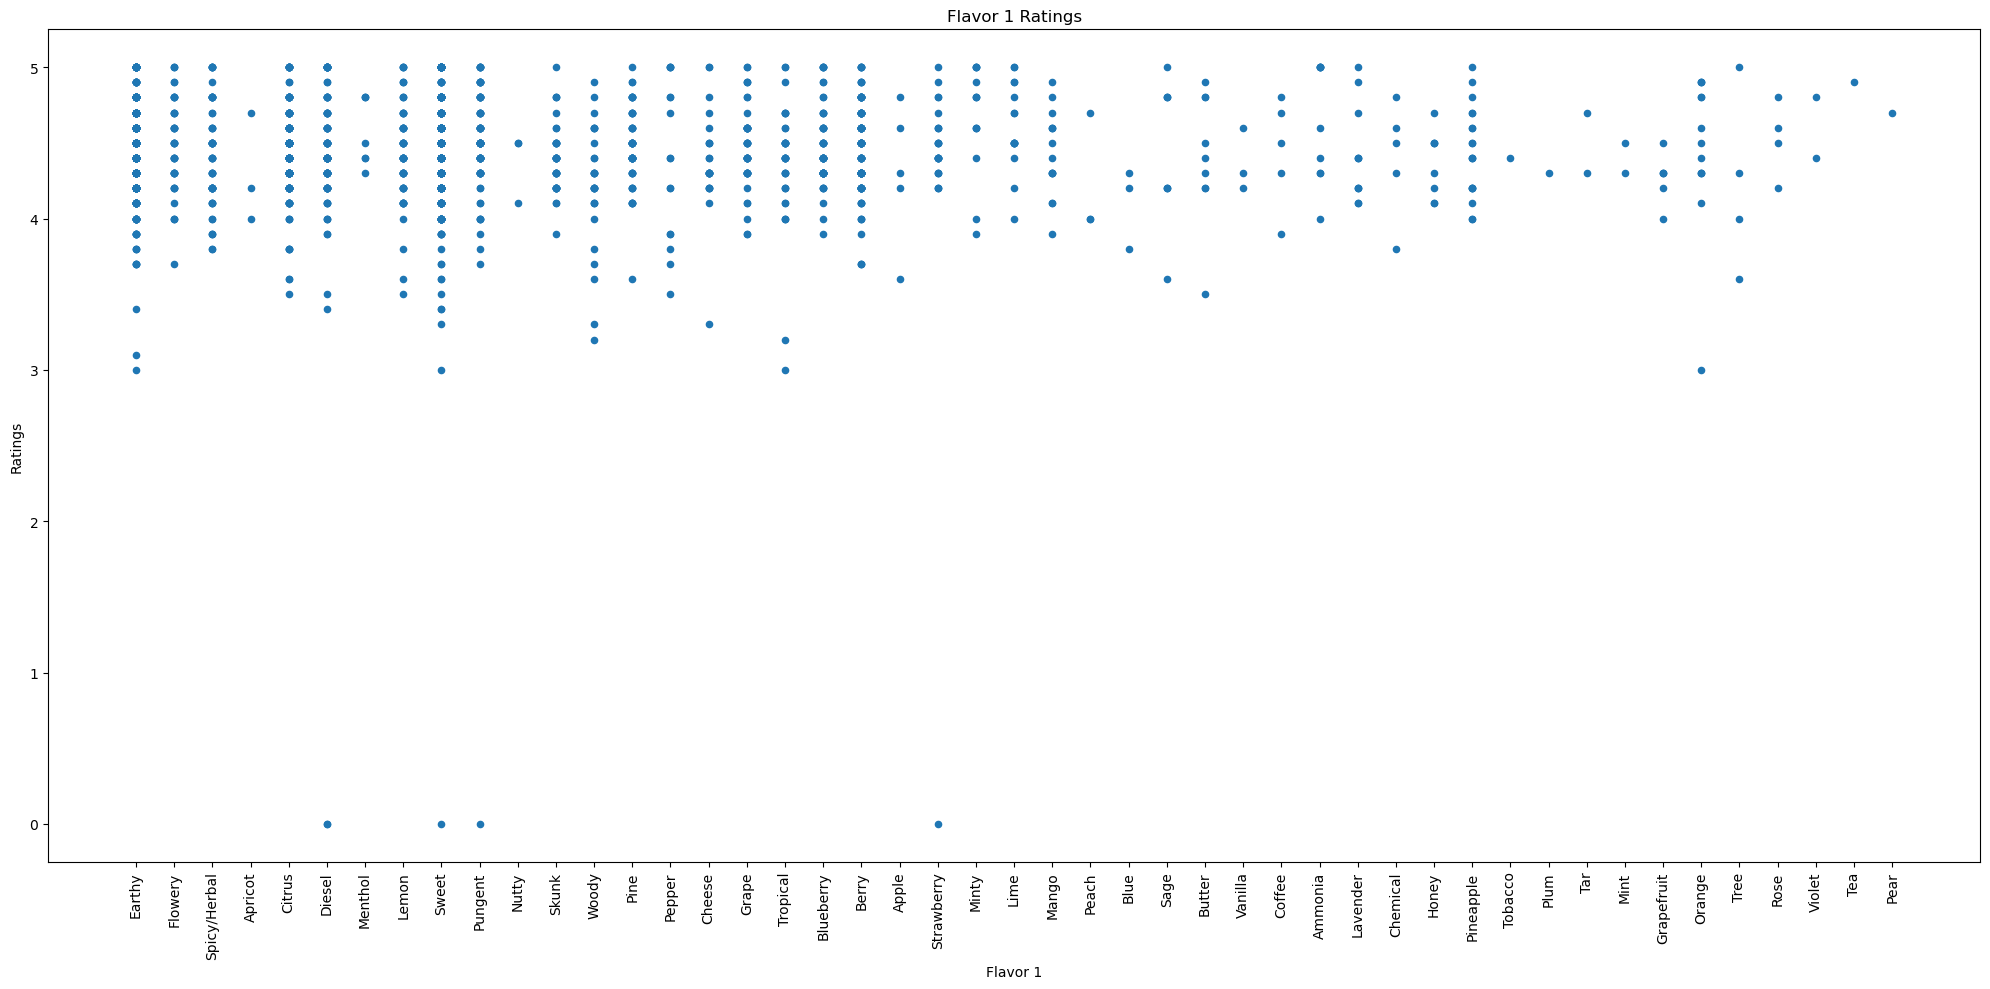

In [47]:
# Create a Scatter Plot of flavor 1 vs rating
OD3.plot(kind = 'scatter', x = 'flavor_1', y = 'Rating', figsize=(20, 10), rot=90)
plt.title("Flavor 1 Ratings")
plt.xlabel("Flavor 1")
plt.ylabel("Ratings")
plt.tight_layout()
plt.show()



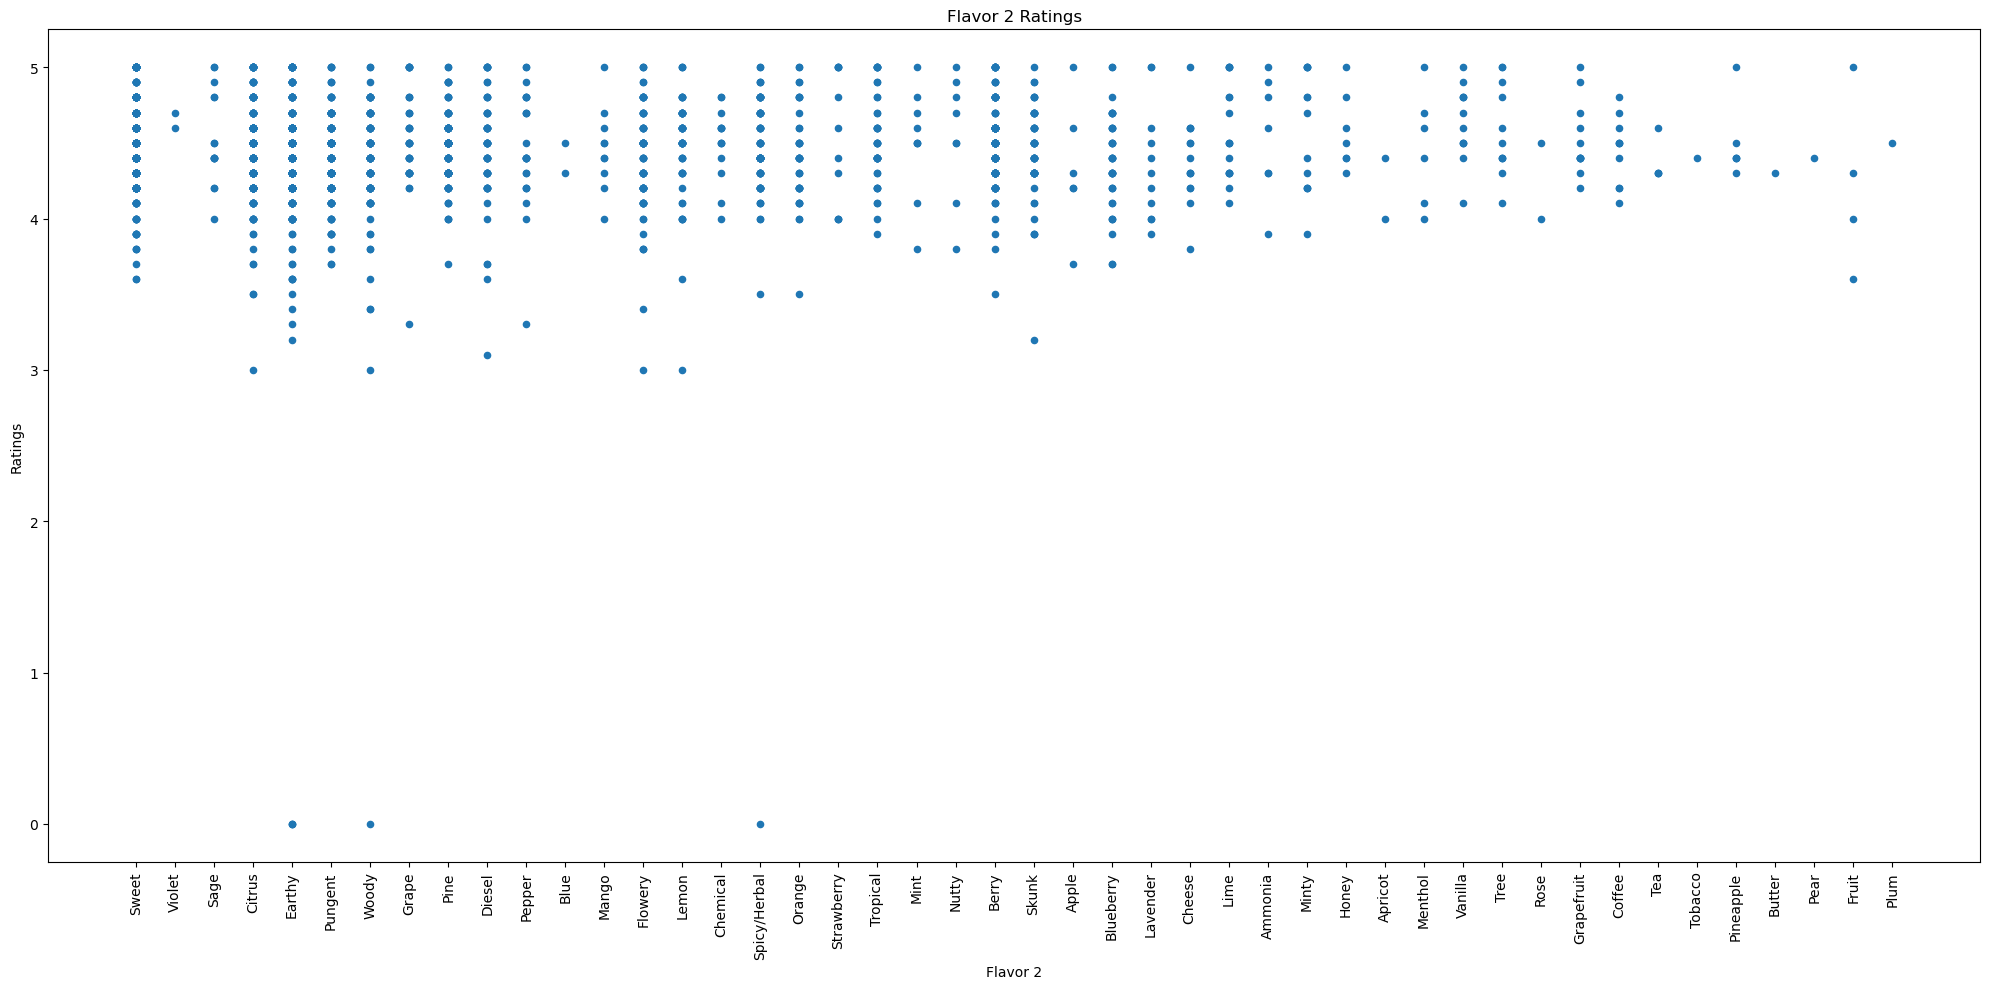

In [48]:
# Create a Scatter Plot of flavor 2 vs rating
OD3.plot(kind = 'scatter', x = 'flavor_2', y = 'Rating', figsize=(20, 10), rot=90)
plt.title("Flavor 2 Ratings")
plt.xlabel("Flavor 2")
plt.ylabel("Ratings")
plt.tight_layout()
plt.show()


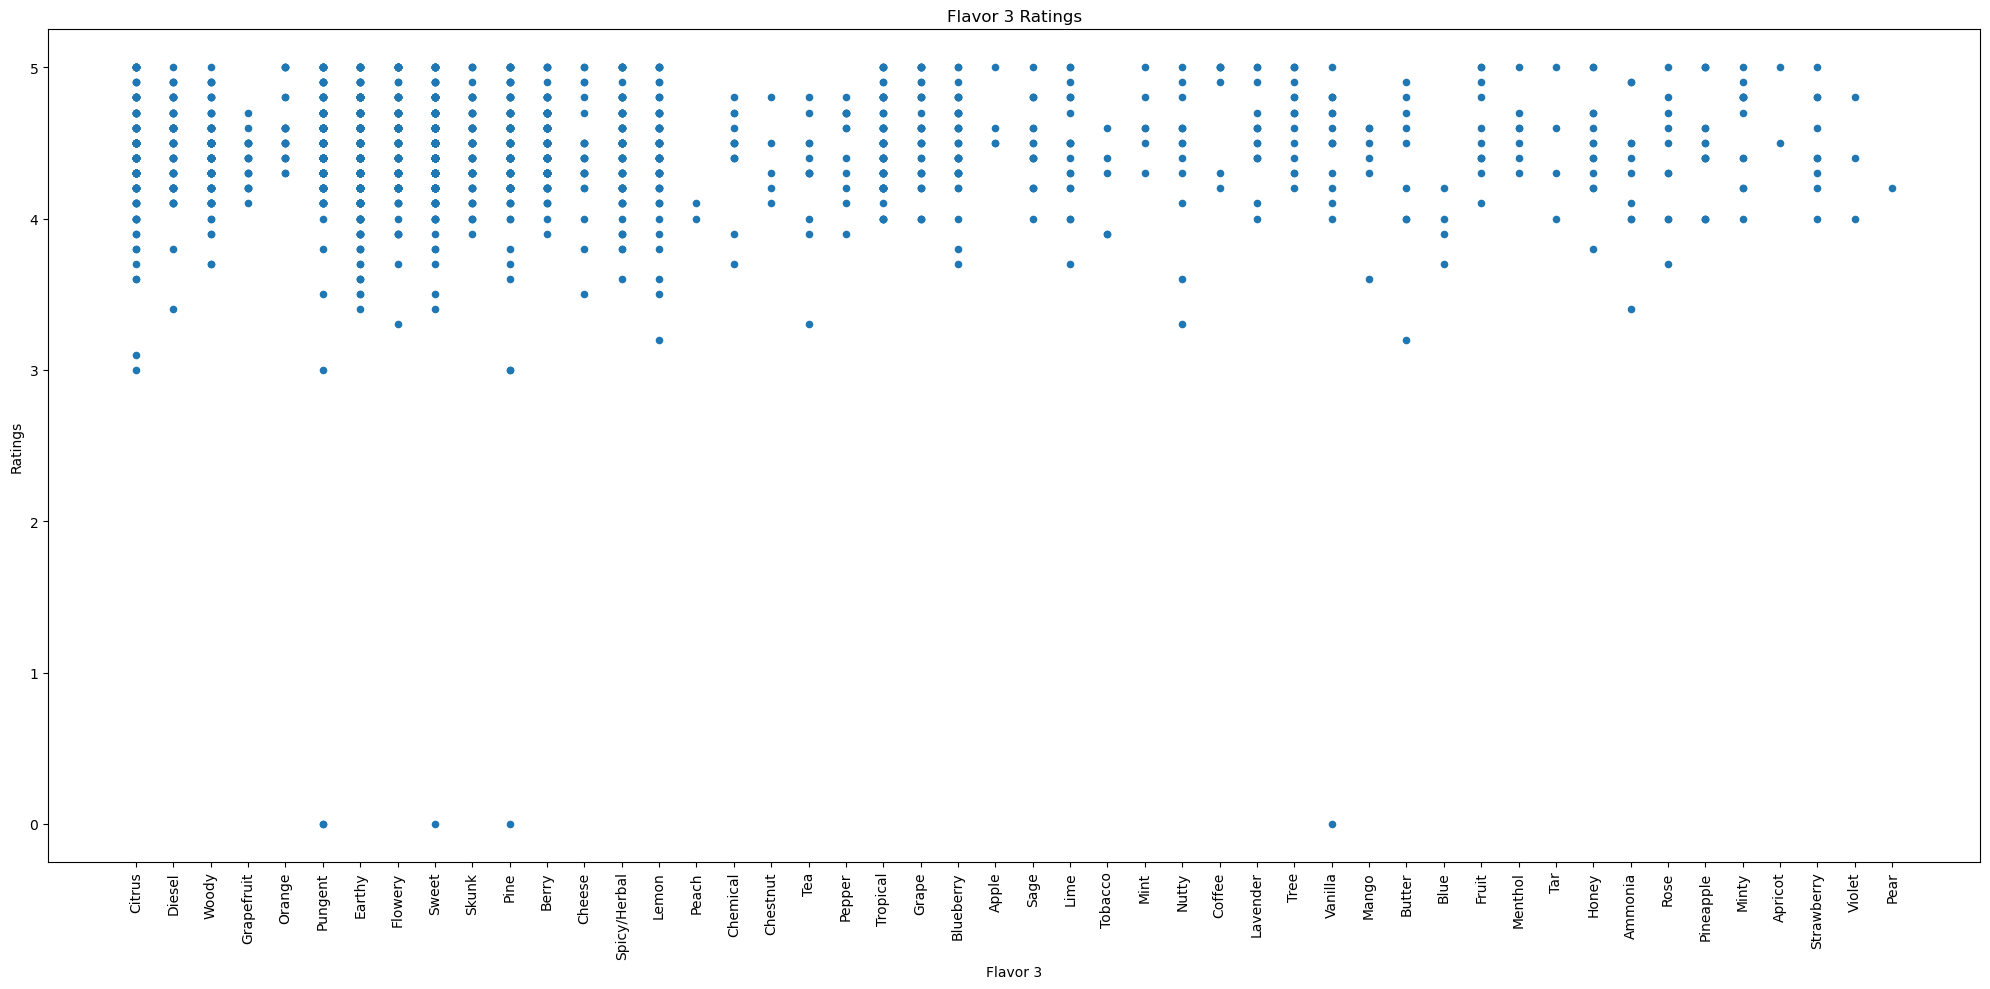

In [49]:
# Create a Scatter Plot of flavor 3 vs rating
OD3.plot(kind = 'scatter', x = 'flavor_3', y = 'Rating', figsize=(20, 10), rot=90)
plt.title("Flavor 3 Ratings")
plt.xlabel("Flavor 3")
plt.ylabel("Ratings")
plt.tight_layout()
plt.show()

In [50]:
per_flavor1_rating = OD3.groupby("flavor_1")
per_flavor1_rating = per_flavor1_rating["Rating"].mean()
per_flavor1_rating

flavor_1
Ammonia         4.660000
Apple           4.300000
Apricot         4.300000
Berry           4.469027
Blue            4.100000
Blueberry       4.471667
Butter          4.400000
Cheese          4.375000
Chemical        4.400000
Citrus          4.447159
Coffee          4.440000
Diesel          4.389000
Earthy          4.456436
Flowery         4.488636
Grape           4.469565
Grapefruit      4.266667
Honey           4.362500
Lavender        4.418182
Lemon           4.430769
Lime            4.600000
Mango           4.426667
Menthol         4.571429
Mint            4.400000
Minty           4.671429
Nutty           4.366667
Orange          4.446154
Peach           4.233333
Pear            4.700000
Pepper          4.393750
Pine            4.469643
Pineapple       4.442105
Plum            4.300000
Pungent         4.468235
Rose            4.525000
Sage            4.450000
Skunk           4.392500
Spicy/Herbal    4.439344
Strawberry      4.319231
Sweet           4.437403
Tar             

In [75]:
per_flavor1_rating.count()

47

In [79]:
per_flavor1_rating.mean()

4.431375704417973

In [115]:
per_flavor1_rating.mode()

0    4.4
Name: Rating, dtype: float64

In [92]:
per_flavor1_rating.min()

4.1000000000000005

In [93]:
per_flavor1_rating.max()

4.9

In [51]:
#from scipy.stats import linregress

In [52]:
# #Perform a linear regression on flavor_1 vs. rating mean
# x = ["per_flavor1_rating"]
# y = OD3["Rating"]

# x = x.astype(float)
# y = y.astype(float)


# res = st.linregress(x, y)
# print(f"R-squared: {res.rvalue**2:.6f}")

# plt.plot(x, y, 'o', label='original data')
# plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
# plt.legend()
# plt.show()

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = x * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # make plot
# plt.scatter(x,y)
# plt.plot(x,regress_values,"r-")
# plt.annotate(line_eq,(20, 35),fontsize=12,color="blue")
# plt.xlabel('Flavor 1')
# plt.ylabel('Rating')

# corr = OD3.corr(method='pearson')["Flavor 1"]["Rating"]
# print(f"The correlation is {corr}")
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

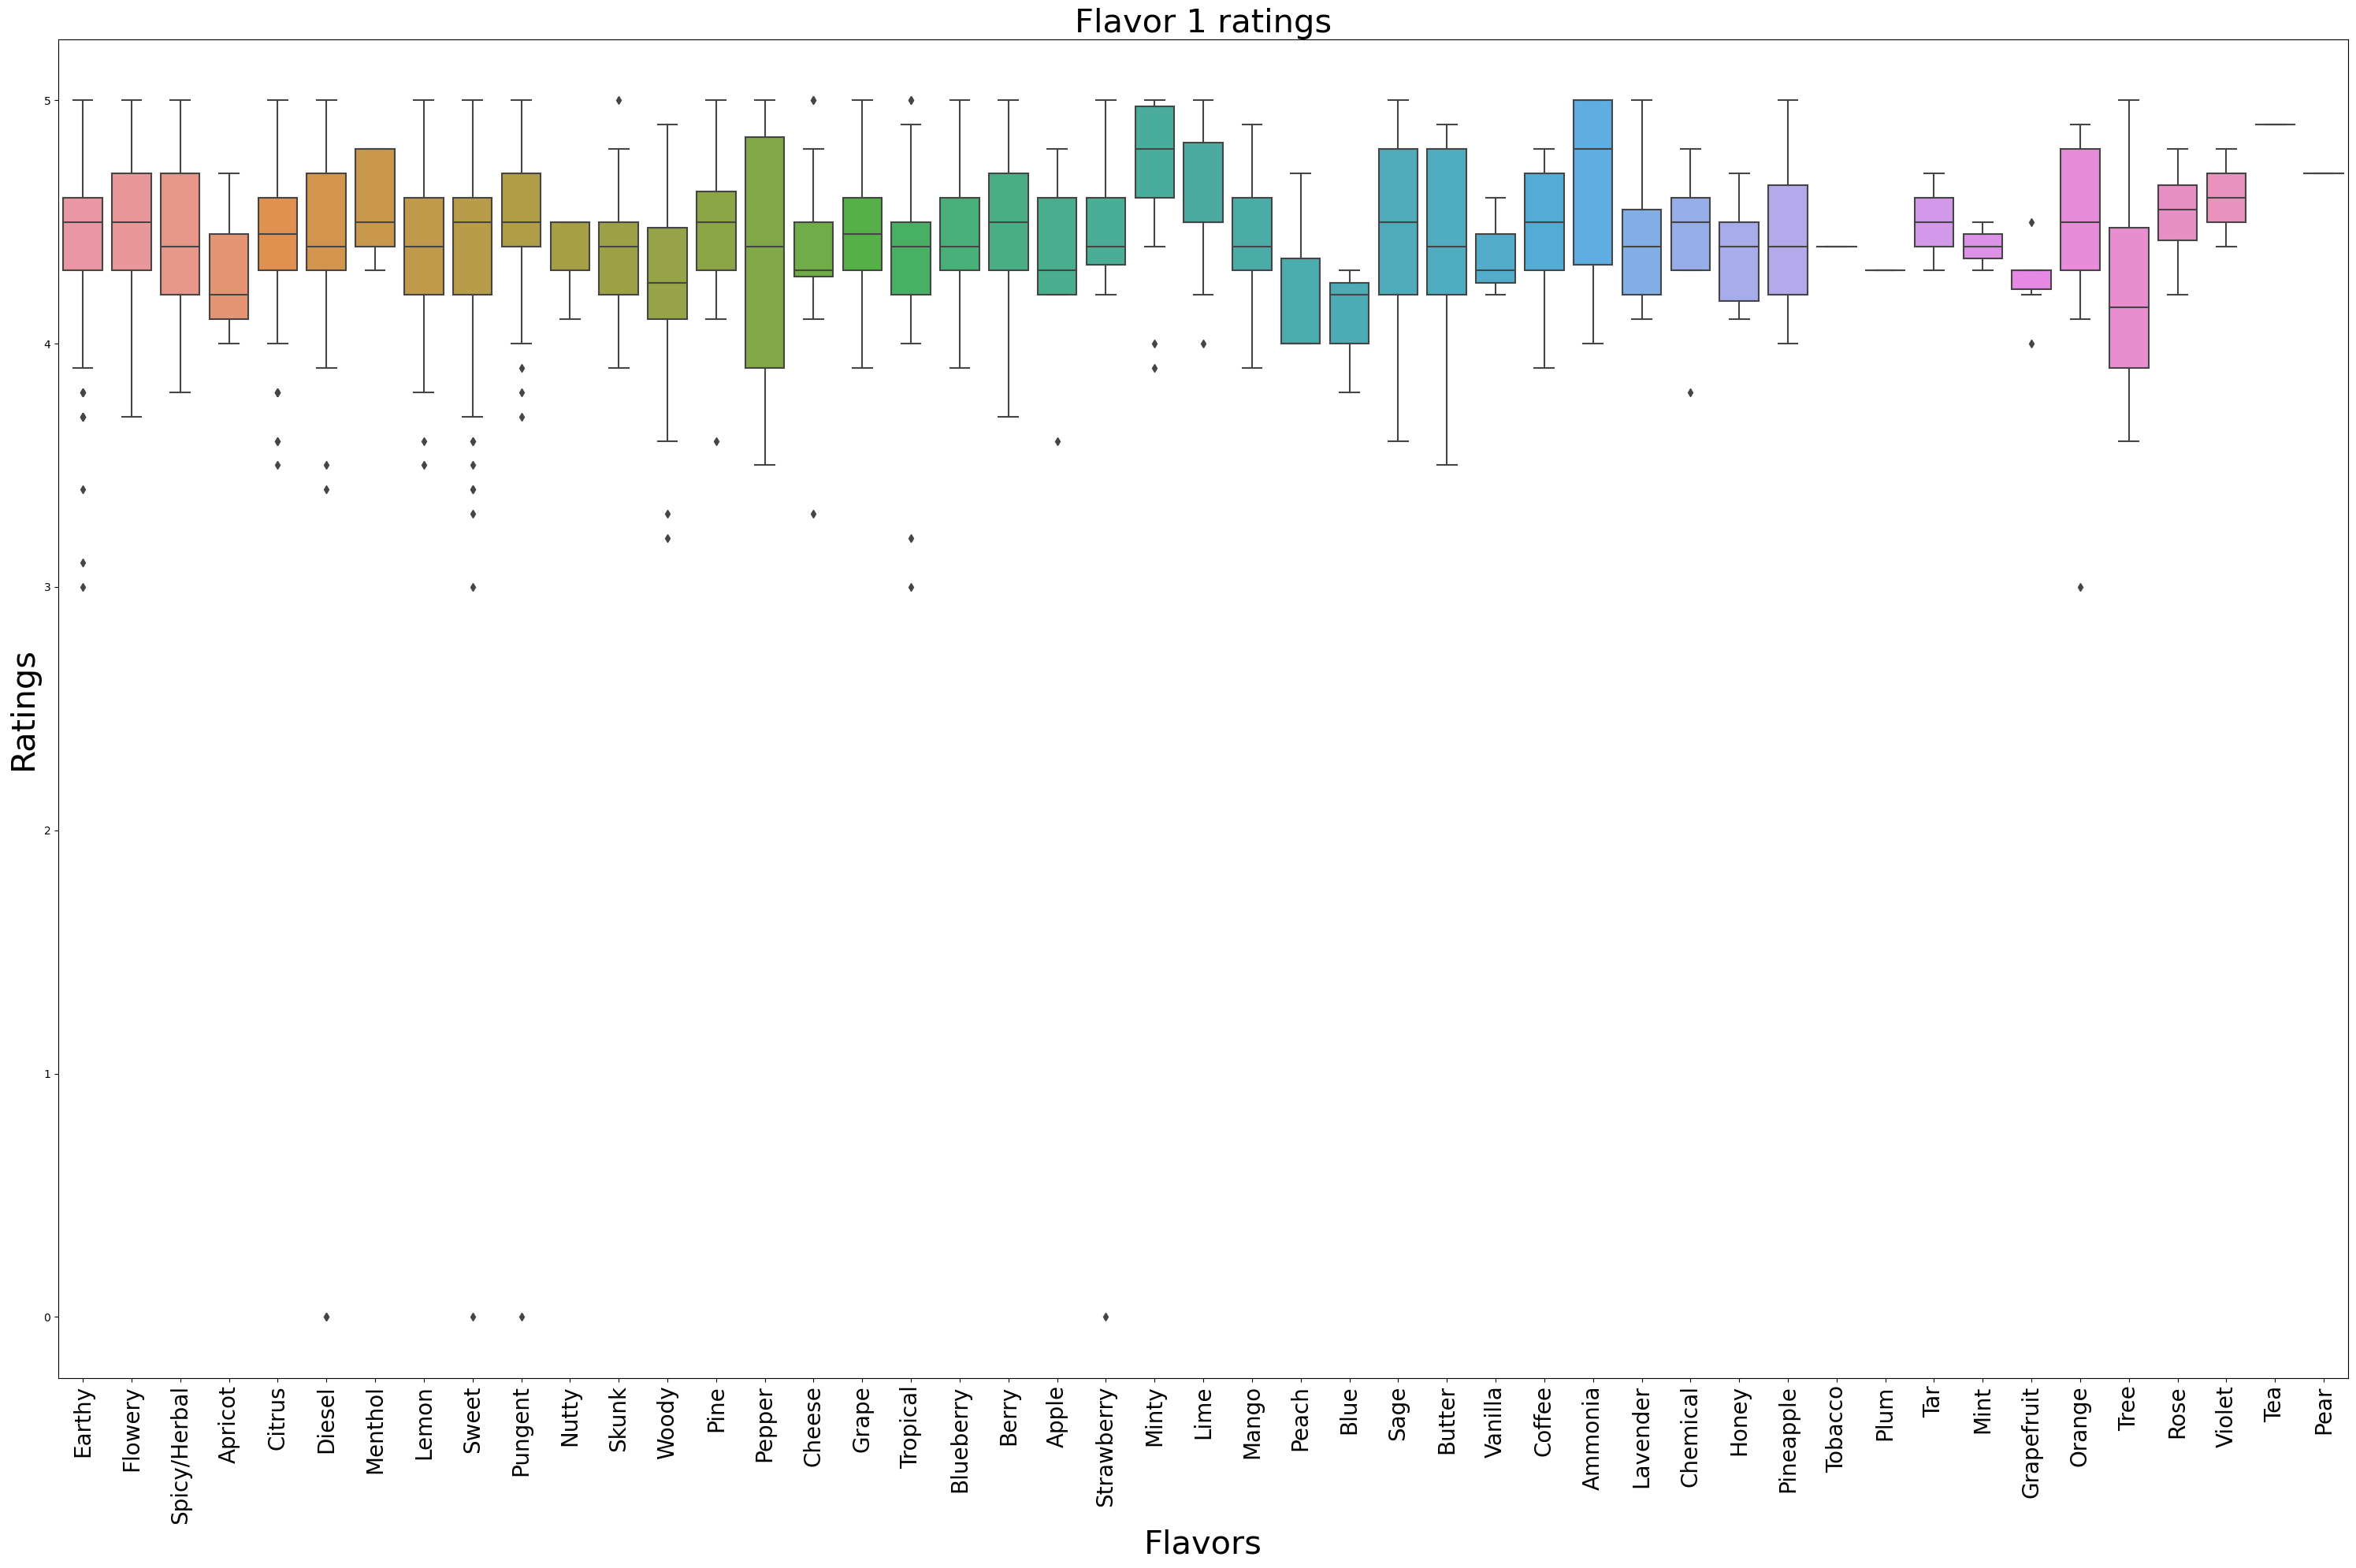

In [89]:
#Create a box plot with flavors and ratings
plt.figure(figsize=(30,20))
box_plot_f1 = sns.boxplot(data=OD3,x="flavor_1",y="Rating")
box_plot_f1.set_xticklabels(box_plot_f1.get_xticklabels(), rotation=90, fontsize=20)
plt.title("Flavor 1 ratings", fontsize=30)
plt.xlabel("Flavors", fontsize=30)
plt.ylabel("Ratings", fontsize=30)
plt.tight_layout()
plt.show()

In [121]:
per_flavor2_rating = OD3.groupby("flavor_2")
per_flavor2_rating = per_flavor2_rating["Rating"].mean()
per_flavor2_rating

flavor_2
Ammonia         4.542857
Apple           4.333333
Apricot         4.200000
Berry           4.504274
Blue            4.400000
Blueberry       4.384211
Butter          4.300000
Cheese          4.385714
Chemical        4.500000
Citrus          4.450000
Coffee          4.450000
Diesel          4.465517
Earthy          4.374570
Flowery         4.396154
Fruit           4.225000
Grape           4.526316
Grapefruit      4.516667
Honey           4.571429
Lavender        4.363636
Lemon           4.477778
Lime            4.570588
Mango           4.460000
Menthol         4.466667
Mint            4.500000
Minty           4.576923
Nutty           4.537500
Orange          4.415385
Pear            4.400000
Pepper          4.468000
Pine            4.463810
Pineapple       4.500000
Plum            4.500000
Pungent         4.403086
Rose            4.250000
Sage            4.526667
Skunk           4.439286
Spicy/Herbal    4.417568
Strawberry      4.554545
Sweet           4.470655
Tea             

In [122]:
per_flavor2_rating.count()

46

In [123]:
per_flavor2_rating.mean()

4.452085907123379

In [124]:
per_flavor2_rating.mode()

0    4.5
Name: Rating, dtype: float64

In [125]:
per_flavor2_rating.min()

4.2

In [126]:
per_flavor2_rating.max()

4.65

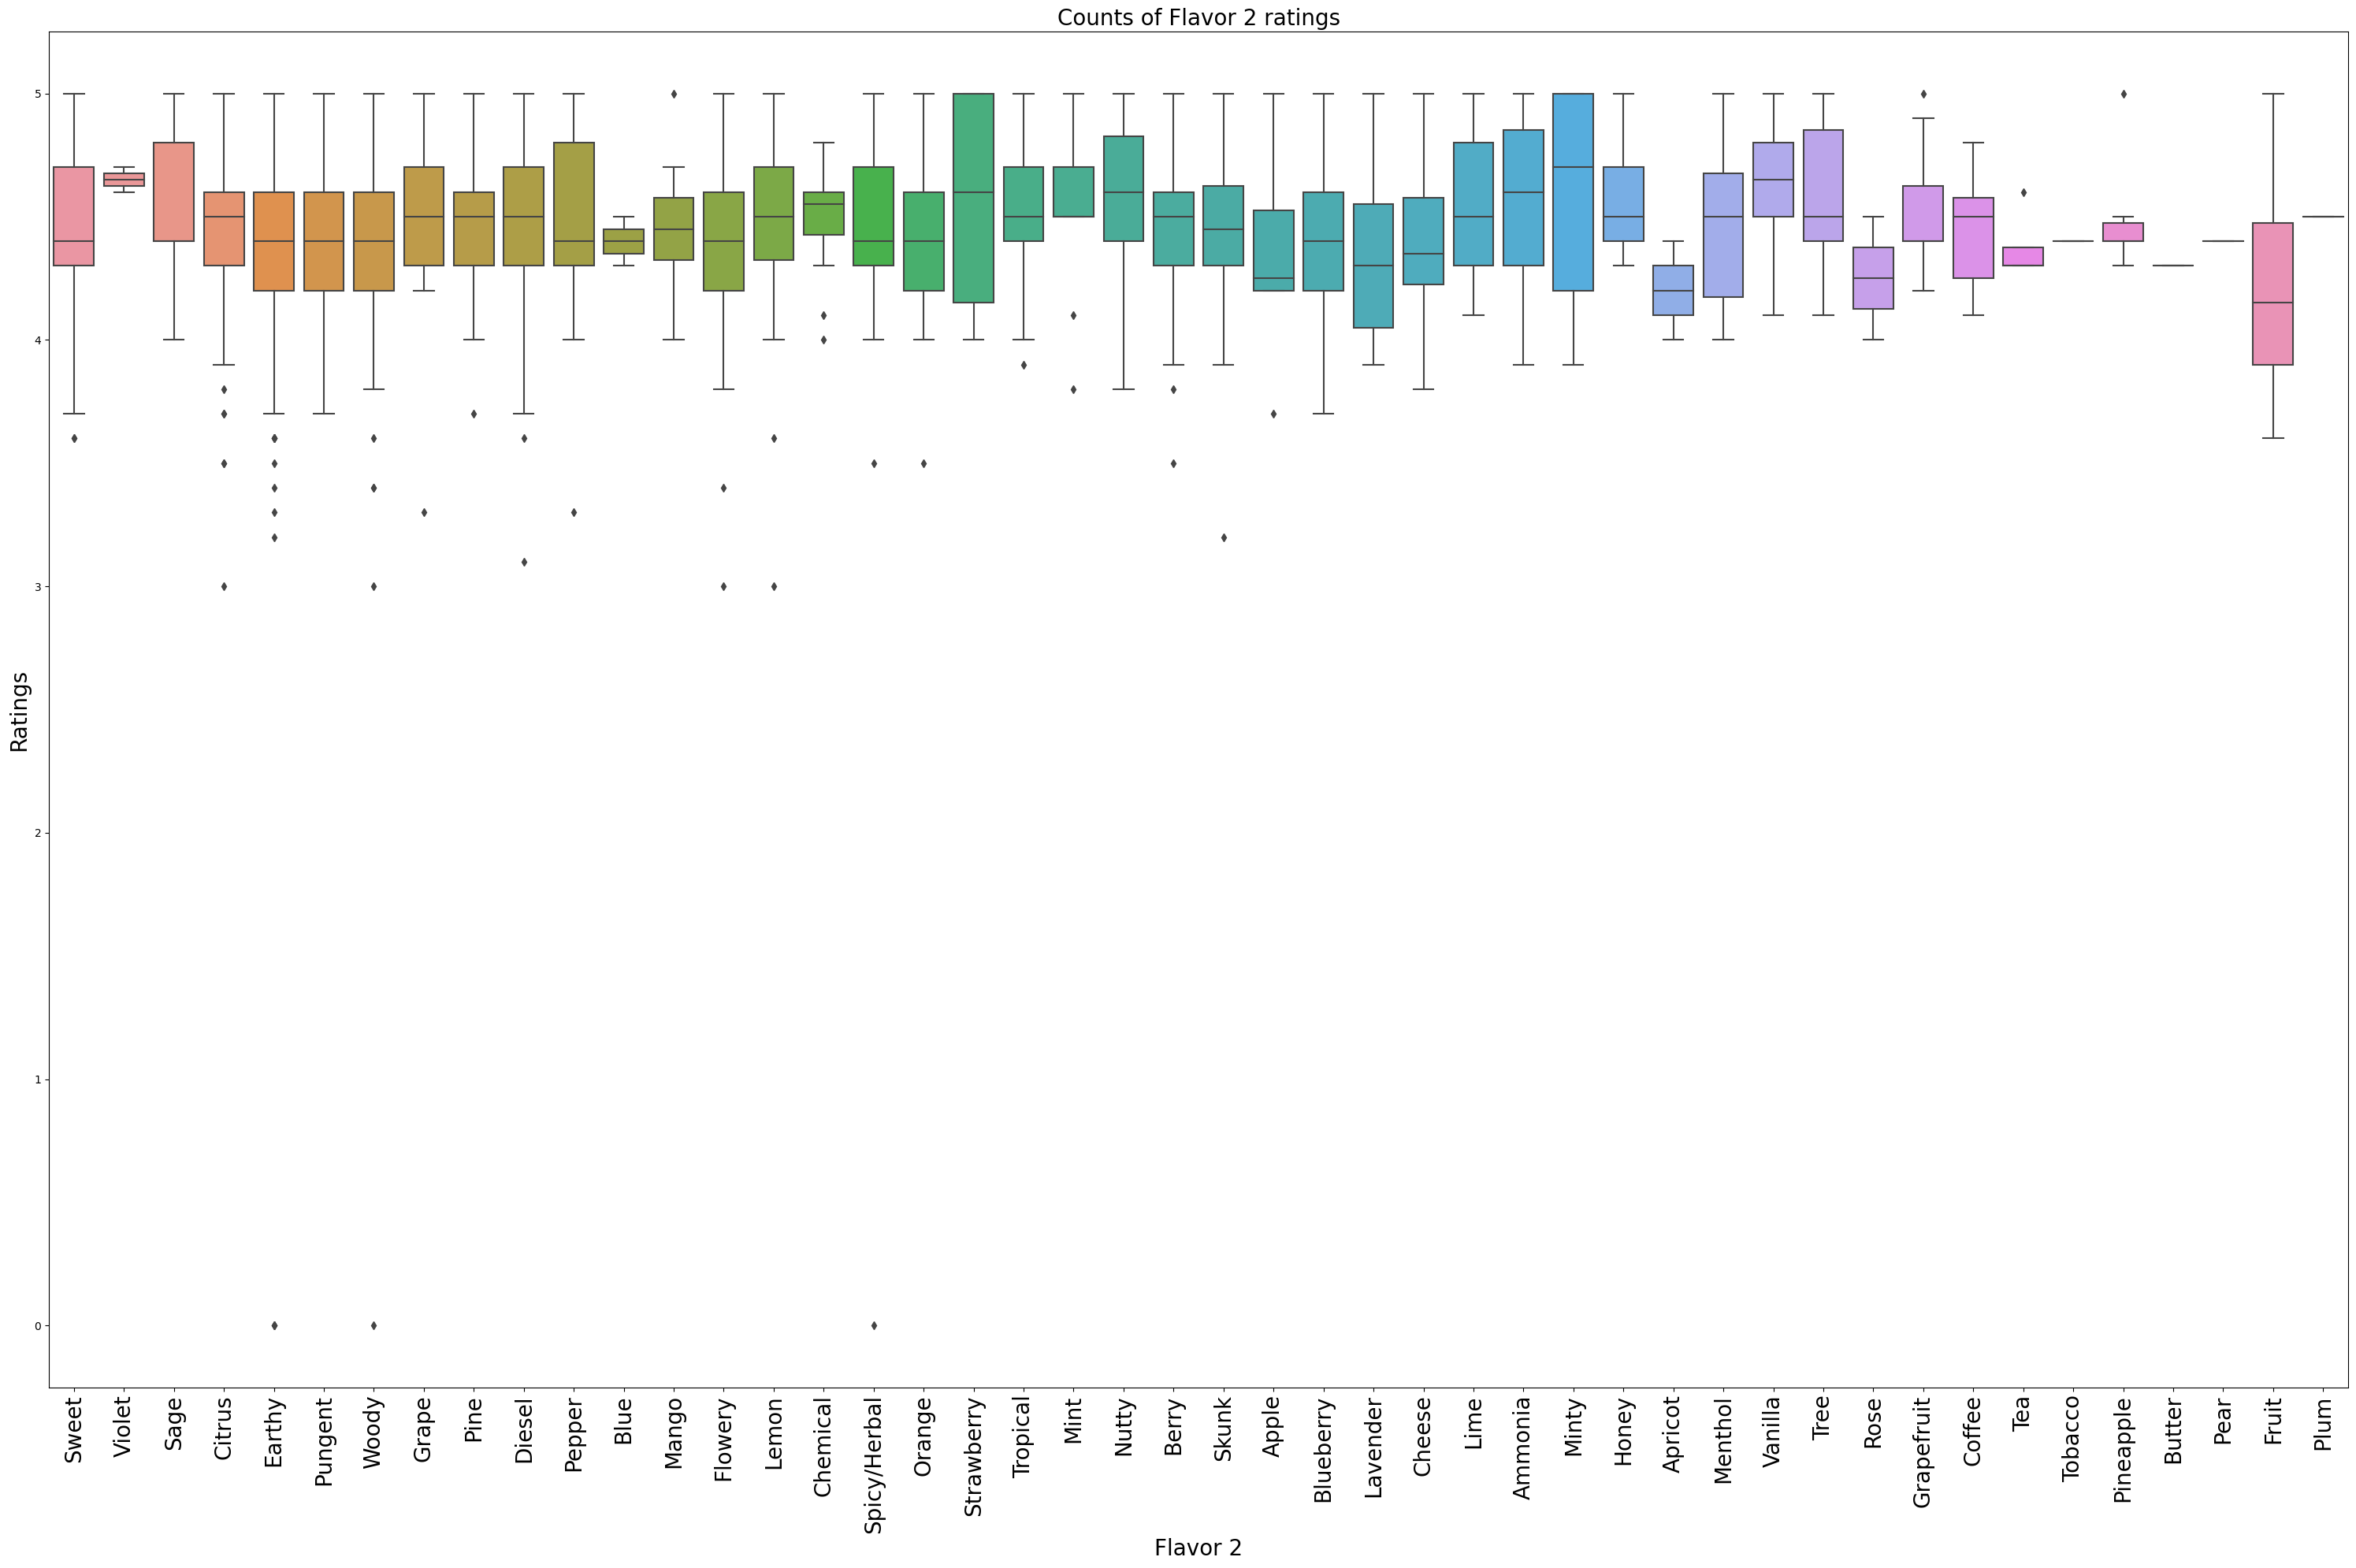

In [55]:
#Create a box plot with flavors and ratings
plt.figure(figsize=(30,20))
box_plot_f2 = sns.boxplot(data=OD3,x="flavor_2",y="Rating")
box_plot_f2.set_xticklabels(box_plot_f2.get_xticklabels(), rotation=90, fontsize=20)
plt.title("Flavor 2 ratings", fontsize=30)
plt.xlabel("Flavor", fontsize=30)
plt.ylabel("Ratings", fontsize=30)
plt.tight_layout()
plt.show()

In [127]:
per_flavor3_rating = OD3.groupby("flavor_3")
per_flavor3_rating = per_flavor3_rating["Rating"].mean()
per_flavor3_rating

flavor_3
Ammonia         4.300000
Apple           4.650000
Apricot         4.750000
Berry           4.479630
Blue            3.950000
Blueberry       4.488889
Butter          4.322222
Cheese          4.420833
Chemical        4.430769
Chestnut        4.380000
Citrus          4.421260
Coffee          4.771429
Diesel          4.467606
Earthy          4.402400
Flowery         4.479070
Fruit           4.581818
Grape           4.567647
Grapefruit      4.378947
Honey           4.484615
Lavender        4.550000
Lemon           4.439063
Lime            4.478947
Mango           4.333333
Menthol         4.585714
Mint            4.633333
Minty           4.600000
Nutty           4.400000
Orange          4.604348
Peach           4.050000
Pear            4.200000
Pepper          4.475000
Pine            4.407759
Pineapple       4.485714
Pungent         4.425967
Rose            4.390000
Sage            4.487500
Skunk           4.456923
Spicy/Herbal    4.468293
Strawberry      4.500000
Sweet           

In [128]:
per_flavor3_rating.mean()

4.442939901588843

In [132]:
per_flavor3_rating.count()

48

In [129]:
per_flavor3_rating.mode()

0    4.4
Name: Rating, dtype: float64

In [130]:
per_flavor3_rating.min()

3.95

In [131]:
per_flavor3_rating.max()

4.771428571428571

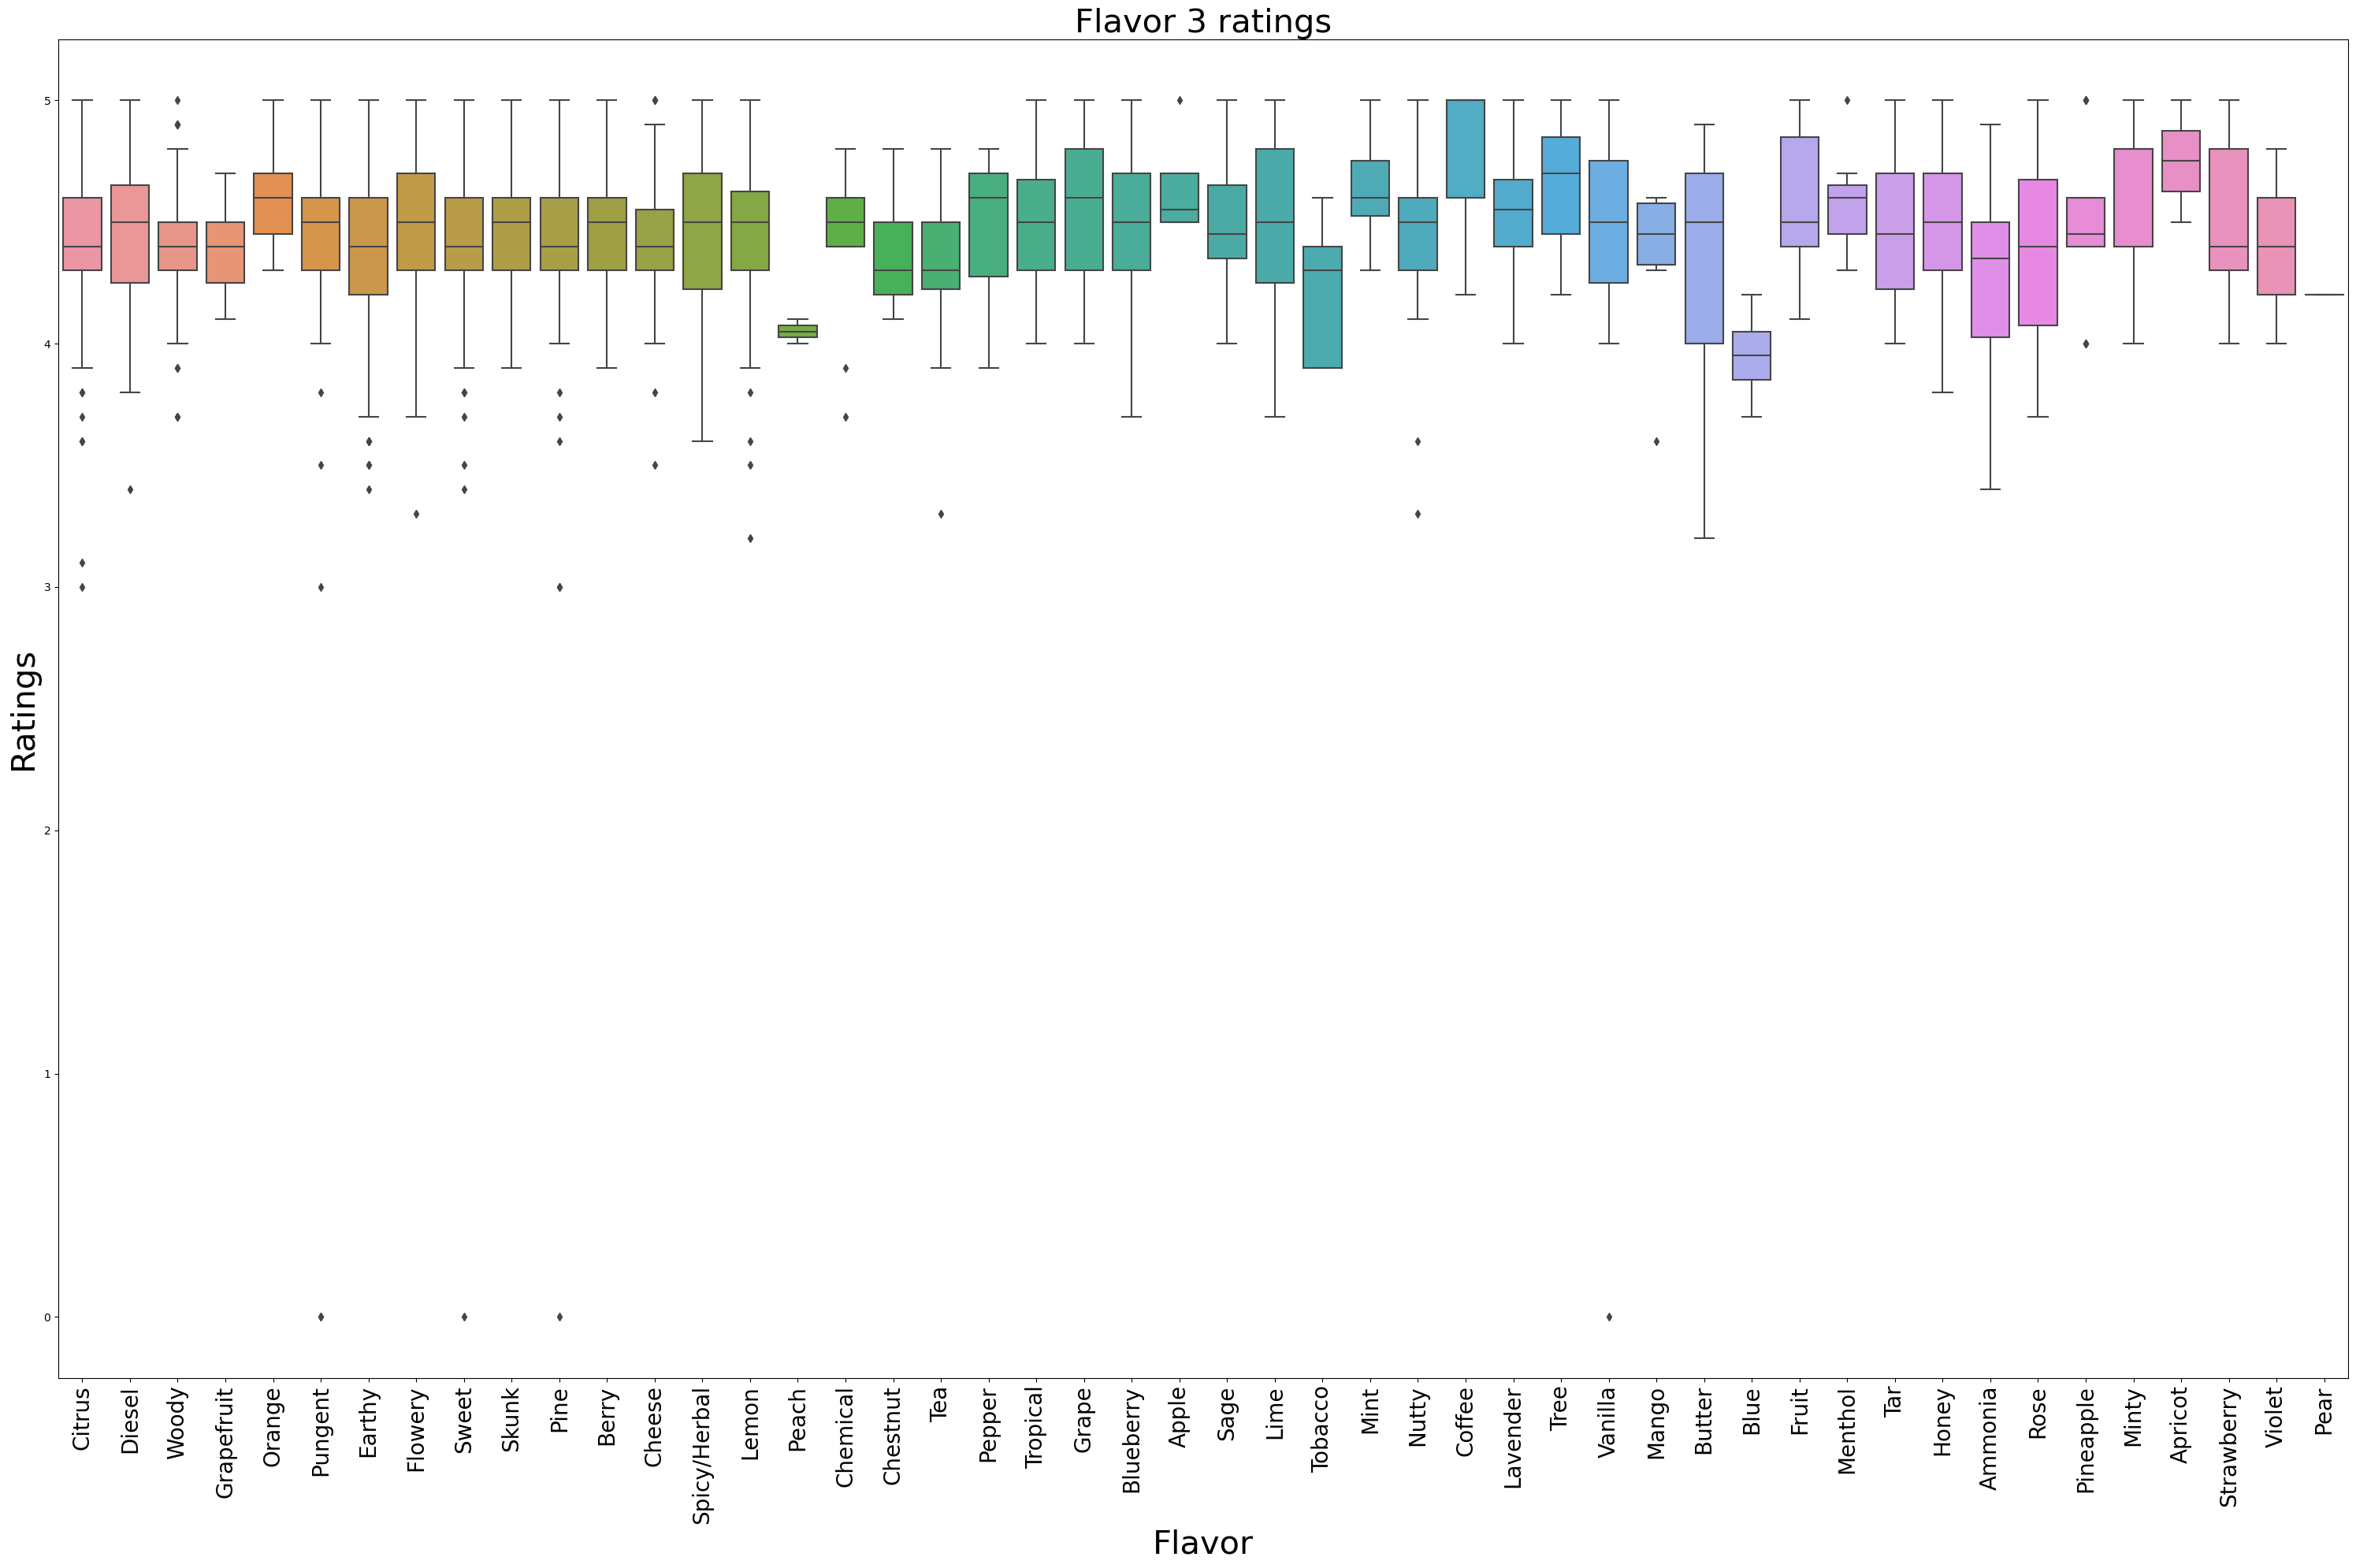

In [97]:
#Create a box plot with flavors and ratings
plt.figure(figsize=(30,20))
box_plot_f3 = sns.boxplot(data=OD3,x="flavor_3",y="Rating")
box_plot_f3.set_xticklabels(box_plot_f3.get_xticklabels(), rotation=90, fontsize=20)
plt.title("Flavor 3 ratings", fontsize=30)
plt.xlabel("Flavor", fontsize=30)
plt.ylabel("Ratings", fontsize=30)
plt.tight_layout()
plt.show()

In [101]:
#Calculate P values to compare all three flavors
#First separate ratings by flavor and then compare them to each other

flavor0=OD3.loc[OD3.Flavor=="flavor_1","Rating"]
flavor1=OD3.loc[OD3.Flavor=="flavor_2","Rating"]
flavor2=OD3.loc[OD3.Flavor=="flavor_3","Rating"]

In [102]:
#Compare flavor 1 vs flavor 2
#P Value Greater than 0.05 means there is no statistical signifcance 
st.ttest_ind(flavor0,flavor1)

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [58]:
#What Flavor has min rating?
#Based on the graphs it looks like pungent, diesel, woody, spicy/herbal, pine, and sweet
#Grouped data by ratings and aggregated the group by min rating
OD3.groupby('Rating').agg('min')

,Strain,Type,Effects,Flavor,Description,effect 1,effect 2,effect 3,effect 4,effect 5,...,num_effects,num_flavors,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3
Rating,,,,,,,,,,,,,,,,,,,,,
0.0,Bootlegger,hybrid,"Hungry,Aroused,Tingly,Uplifted,Creative","Diesel,Earthy,Pungent",Bootlegger is a potent cross of AK-47 and Gupt...,Hungry,Aroused,Aroused,Creative,Creative,...,5,3,Hungry,Aroused,Aroused,Creative,Creative,Diesel,Earthy,Pine
3.0,Coconut-Oil,hybrid,"Aroused,Happy,Relaxed,Uplifted,Creative","Earthy,Woody,Pine",Coconut Oil by Taste Budz is a sativa-dominant...,Aroused,Creative,Energetic,Euphoric,Creative,...,5,3,Aroused,Creative,Energetic,Euphoric,Creative,Earthy,Citrus,Citrus
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYCÂ ...,Relaxed,Sleepy,Uplifted,Hungry,Happy,...,5,3,Relaxed,Sleepy,Uplifted,Hungry,Happy,Earthy,Diesel,Citrus
3.2,M-39,hybrid,"Happy,Uplifted,Focused,Energetic,Giggly","Tropical,Skunk,Butter",Red Widow is a hybrid cross of Red Dragon and ...,Happy,Sleepy,Focused,Energetic,Euphoric,...,5,3,Happy,Sleepy,Focused,Energetic,Euphoric,Tropical,Earthy,Butter
3.3,Cheeseburger,hybrid,"Happy,Uplifted,Energetic,Hungry,Focused","Cheese,Pepper,Tea","Cheeseburger by Cannasol Farms (of Omak, Washi...",Happy,Creative,Energetic,Aroused,Creative,...,5,3,Happy,Creative,Energetic,Aroused,Creative,Cheese,Earthy,Flowery
3.4,Afcrack,hybrid,"Focused,Energetic,Uplifted,Euphoric,Happy","Diesel,Woody,Sweet",Afcrack is a cannabis âspeedballâ of sorts...,Focused,Energetic,Energetic,Energetic,Happy,...,5,3,Focused,Energetic,Energetic,Energetic,Happy,Diesel,Earthy,Ammonia
3.5,Critters-Cookies,hybrid,"Focused,Happy,Aroused,Energetic,Tingly","Butter,Citrus,Cheese",Critters Cookies blends the power of Cookiesâ...,Focused,Happy,Aroused,Creative,Aroused,...,5,3,Focused,Happy,Aroused,Creative,Aroused,Butter,Berry,Cheese
3.6,Apple-Jack,hybrid,"Aroused,Creative,Energetic,Euphoric,Focused","Apple,Sweet,Earthy","A celebrity cannabis strain in Quebec, Freezel...",Aroused,Creative,Creative,Energetic,Aroused,...,5,3,Aroused,Creative,Creative,Energetic,Aroused,Apple,Diesel,Citrus
3.7,Afghan-Diesel,hybrid,"Aroused,Tingly,Uplifted,Creative,Euphoric","Berry,Apple,Blueberry",Afghan Diesel is a hybrid strain withÂ an arom...,Aroused,Creative,Creative,Creative,Aroused,...,5,3,Aroused,Creative,Creative,Creative,Aroused,Berry,Apple,Blue


In [59]:
#What Flavor has max rating?
#Looks like strawbeery, pineapple, apple, butter, violet
#Grouped data by ratings and aggregated the group by max rating
OD3.groupby('Rating').agg('max')

,Strain,Type,Effects,Flavor,Description,effect 1,effect 2,effect 3,effect 4,effect 5,...,num_effects,num_flavors,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3
Rating,,,,,,,,,,,,,,,,,,,,,
0.0,The-Wills,indica,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",The Wills is a flavorful Willyâs Wonder phen...,Uplifted,Tingly,Uplifted,Uplifted,Happy,...,5,3,Uplifted,Tingly,Uplifted,Uplifted,Happy,Sweet,Woody,Vanilla
3.0,True-X,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",True X by Royal Choice Farms is an indica-domi...,Uplifted,Happy,Sleepy,Uplifted,Uplifted,...,5,3,Uplifted,Happy,Sleepy,Uplifted,Uplifted,Tropical,Woody,Pungent
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYCÂ ...,Relaxed,Sleepy,Uplifted,Hungry,Happy,...,5,3,Relaxed,Sleepy,Uplifted,Hungry,Happy,Earthy,Diesel,Citrus
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...,Relaxed,Uplifted,Happy,Hungry,Giggly,...,5,3,Relaxed,Uplifted,Happy,Hungry,Giggly,Woody,Skunk,Lemon
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa isÂ a 70/30 sativa-dominant hyb...,Tingly,Uplifted,Relaxed,Hungry,Hungry,...,5,3,Tingly,Uplifted,Relaxed,Hungry,Hungry,Woody,Pepper,Tea
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i...",Uplifted,Uplifted,Uplifted,Relaxed,Uplifted,...,5,3,Uplifted,Uplifted,Uplifted,Relaxed,Uplifted,Sweet,Woody,Sweet
3.5,Purple-Goat,sativa,"Uplifted,Tingly,Relaxed,Euphoric,Aroused","Sweet,Berry,Earthy",Purple Goat is a hybrid cross between Trainwre...,Uplifted,Uplifted,Talkative,Happy,Tingly,...,5,3,Uplifted,Uplifted,Talkative,Happy,Tingly,Sweet,Spicy/Herbal,Sweet
3.6,West-Og,sativa,"Relaxed,Sleepy,Focused,Talkative,Happy","Woody,Lemon,Spicy/Herbal",Sweet Lafayette is an 80% indica strain with m...,Relaxed,Uplifted,Uplifted,Uplifted,Uplifted,...,5,4,Relaxed,Uplifted,Uplifted,Uplifted,Uplifted,Woody,Woody,Spicy/Herbal
3.7,Tahoe-Hydro-Champagne,sativa,"Uplifted,Talkative,Energetic,Euphoric,Creative","Woody,Citrus,Earthy",Tahoe Hydro Champagne is a complex sativa-domi...,Uplifted,Tingly,Uplifted,Uplifted,Uplifted,...,5,4,Uplifted,Tingly,Uplifted,Uplifted,Uplifted,Woody,Sweet,Woody


In [60]:
# #Hybrid dataframe Robbins
# #Pull Hybrid Type from DF
# hybrid_df = OD3.groupby(["Type", "effect_1", "Rating"]).size()
# hybrid_2_df=pd.DataFrame(hybrid_df)
# hybrid_2_df.head()

In [61]:
# final=hybrid_2_df.loc["hybrid"]
# final.head(5)

In [62]:
# final=hybrid_2_df.loc["indica"]
# final.head(5)

In [63]:
# final=hybrid_2_df.loc["sativa"]
# final.head(5)

In [64]:
# ----hybrid_2_df.loc["sativa","hybrid","indica"]
# rating_plot.set
# plt.xlabel("Type [Cannabis]")
# plt.ylabel("Rating by Type")
# plt.title("Rating by Type")
# plt.tight_layout()
# plt.show()

In [65]:
# #Does the “Effect” show the significant difference experienced by consumers while “Rating” the same cannabis type differently? 
# #Place all “Type” of Cannabis in a Table(columns) with all five(5) effects to review the “Rating” for each
# cols=["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5","Rating"]
# OD3[cols].head()

In [66]:
# #Same command as above but pull with: .size()
# OD3.groupby(["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5","Rating"]).size()

In [67]:
# plt.scatter(-----['Type'],------------['Rating'])
# color_bar = plt.colorbar()
# color_bar.set_label('Effect')
# plt.xlabel('Type')
# plt.ylabel('Rating')

In [68]:
# #How does this affect how they rate it? Ex: Hybrid- 13 users said it made them aroused. 
# #What is the average rating reported by those 13 people? Repeat for a few more effects in Hybrid, Sativa, then Indica.
# #Request the “Rating” of each ‘Effect” by the min to find the Significant Difference by “Rating” of “Effect”
# per_all_effect_rating = OD3.groupby(["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5"])
# per_all_effect_rating = per_all_effect_rating["Rating"].min()
# per_all_effect_rating

In [69]:
# #Create a Box plot to see if ratings vary depending on the effect (using effect 1)

# box_plot_e1=sns.boxplot(data=OD3,x="effect_1",y="Rating")
# box_plot_e1.set_xticklabels(box_plot_e1.get_xticklabels(), rotation=40,ha="right")
# plt.tight_layout()

# plt.show()

In [ ]:
#df3.to_csv("MaryJane_clean_data.csv", index=False)